# | Imports, functions & data load

## | Reset variables

Notebook variables reset for each complete execution of this code :

In [1]:
%reset -f

## | Installations & Imports

### | Installations

In [2]:
# %pip install streamlit

In [3]:
# %pip install catboost

In [4]:
# %pip install xgboost

In [5]:
# %pip install imblearn

In [6]:
# %pip install shap

In [7]:
# %pip install tqdm

In [8]:
# %pip install lightgbm

### | Imports

In [9]:
import autopep8

import pandas as pd
import seaborn as sns
import numpy as np
import time
import pickle
import joblib
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import array as arr
from tqdm import tqdm
import sklearn
print("Scikit-Learn version : {}".format(sklearn.__version__))

from zipfile import ZipFile

# Preprocessing, Imputing, Upsampling, Model Selection, Model Evaluation
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from collections import Counter

from imblearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as imbpipeline

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_score, learning_curve, cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import fbeta_score, make_scorer, auc
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import get_scorer_names


#Predictive Models

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
# print("lightgbm version : {}".format(lightgbm.__version__))
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

# Interpreting Predictions

import shap
print("SHAP version : {}".format(shap.__version__))

# app building
import streamlit as st
# print("streamlit version : {}".format(streamlit.__version__))

Scikit-Learn version : 1.1.2
SHAP version : 0.41.0


## | Parameters

In [10]:
plt.style.use('fivethirtyeight')
plt.rcParams.update(
    {
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.labelsize': 15,
     'legend.fontsize': 15,
     'axes.titlesize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

In [11]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour bien visualiser les colonnes
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 1000)

# Format des graphiques seaborn
sns.set_theme(style="whitegrid")

# | Test data restore for model interpretation

In [33]:
# on recharge les données de test
X_test = joblib.load('Models/X_test.pkl')
X_test

CODE_GENDER  AMT_CREDIT  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  ELEVATORS_AVG  FLOORSMAX_AVG  LIVINGAREA_AVG  ELEVATORS_MODE  FLOORSMAX_MODE  LIVINGAREA_MODE  ELEVATORS_MEDI  FLOORSMAX_MEDI  LIVINGAREA_MEDI  TOTALAREA_MODE  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Higher education  NAME_EDUCATION_TYPE_Secondary_secondary special  OCCUPATION_TYPE_Drivers  OCCUPATION_TYPE_Laborers  ORGANIZATION_TYPE_XNA  HOUSETYPE_MODE_block of flats  WALLSMATERIAL_MODE_Panel  DAYS_EMPLOYED_PERC  BURO_DAYS_CREDIT_MIN  BURO_DAYS_CREDIT_MAX  BURO_DAYS_CREDIT_MEAN  BURO_DAYS_CREDIT_VAR  \
0             0.0    497520.0         450000.0                    0.014464    -19654.0         -235.0           -13084.0          -3201.0             1.0                   2.0                          2.0                     0.0                      0.0      0.273594      0.752981      0.535276           0.00         0.1250          0.0396          0.0000          0.1250           0.0413            0.00          0.1250           0.0404          0.0323                       0.0                       0.0                 -1550.0              1.0                            1.0                                 0.0                         0.0                       1.0                                   0.0                                              1.0                      0.0                       0.0                    0.0                            1.0                       0.0            0.011957               -1827.0                -300.0           -1050.571429          3.851066e+05   
1             0.0    719946.0         643500.0                    0.019101    -10698.0        -2582.0             -465.0          -3323.0             1.0                   2.0                          2.0                     0.0                      0.0      0.514014      0.667375      0.385915           0.35         0.4583          0.2140          0.4028          0.4583           0.1807            0.40          0.4583           0.2203          0.1964                       0.0                       0.0                 -2526.0              1.0                            1.0                                 0.0                         0.0                       1.0                                   0.0                                              1.0                      0.0                       0.0                    0.0                            1.0                       0.0            0.241354               -2171.0                -267.0            -887.000000          7.657707e+05   
2             1.0    544491.0         454500.0                    0.020246    -12552.0        -1020.0            -2360.0          -2692.0             1.0                   3.0                          3.0                     0.0                      0.0      0.793300      0.445463      0.191822           0.14         0.3542          0.1294          0.1208          0.3333           0.1119            0.14          0.3542           0.1317          0.0851                       0.0                       0.0                 -1168.0              1.0                            1.0                                 0.0                         0.0                       1.0                                   1.0                                              0.0                      0.0                       0.0                    0.0                            1.0                       0.0            0.081262               -2769.0               -2369.0           -2569.000000          8.000000e+04   
3     

On vérifie que les noms des colonnes ne poseront pas de problème par la suite. Le caractère ' / ' n'est pas reconnu dans Streamlit.

In [34]:
dash_cols = [col for col in X_test.columns if '/' in col]
X_test[dash_cols]

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[10000 rows x 0 columns]

In [35]:
# on recharge les données de test
y_test = joblib.load('Models/y_test.pkl')
y_test

SK_ID_CURR
309296    0.0
316121    0.0
220130    0.0
254432    0.0
345565    0.0
         ... 
341501    0.0
141399    0.0
264474    0.0
129213    0.0
155576    0.0
Name: TARGET, Length: 10000, dtype: float64

# | Interpreting predictions with SHAP | TreeExplainer

## | Model restore / data preprocessing / y_pred with threshold / init JS

In [36]:
# on recharge le modèle LogReg
model = joblib.load('Models/best_model_LightGBM_NS.joblib')
model

Pipeline(steps=[('impute', SimpleImputer()), ('smote', SMOTE(random_state=42)),
                ['classifier',
                 LGBMClassifier(colsample_bytree=0.99, max_depth=9,
                                random_state=42, reg_lambda=2,
                                subsample=0.5)]])

Je retire l'étape du SMOTE car on ne SMOTE pas les données test.

In [37]:
# we do not apply SMOTE on test data
model.steps.pop(1)

('smote', SMOTE(random_state=42))

In [38]:
model

Pipeline(steps=[('impute', SimpleImputer()),
                ['classifier',
                 LGBMClassifier(colsample_bytree=0.99, max_depth=9,
                                random_state=42, reg_lambda=2,
                                subsample=0.5)]])

In [39]:
# on recharge le best_threshold pour le modèle retenu
best_thresh = joblib.load('Models/best_thresh_LightGBM_NS.joblib')
best_thresh

0.10101010101010102

In [40]:
# save X_columns to be able to name array columns afterwards
X_columns = X_test.columns

# X_test as a dataframe (only imputer)
X_test = pd.DataFrame(model['impute'].transform(X_test), columns=X_columns)

# predictions from X_test using best threshold
y_pred = (model.predict_proba(X_test)[:, 1]>best_thresh)*1
# as_type...

In [41]:
print('y_pred contient',y_pred.shape[0],'observations, dont',sum(y_pred),'prévisions de défaut')

y_pred contient 10000 observations, dont 2960 prévisions de défaut


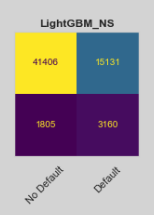

This corresponds to the initial LightGBM predictions rate:<br>
15 131 + 3 160 = 18 291 / 61 502 (total) = 29.74% <br>
2960 / 10 000 = 29.60% <br>
The sample respects the initial class representations.

In [42]:
y_pred_contrib = model.predict(X_test, pred_contrib=True)

In [43]:
#load JS vis in the notebook
shap.initjs()

## | Interpreting model with SHAP

### | Creating explainer and SHAP values

In [44]:
print(shap.__version__)

0.41.0


In [45]:
model.classes_

array([0., 1.])

In [46]:
model

Pipeline(steps=[('impute', SimpleImputer()),
                ['classifier',
                 LGBMClassifier(colsample_bytree=0.99, max_depth=9,
                                random_state=42, reg_lambda=2,
                                subsample=0.5)]])

In [47]:
# explain the model's predictions using SHAP
# possible que Tree Explainer ne permette pas de mettre les features dans l'unité d'origine
explainer = shap.TreeExplainer(model['classifier'], X_test)
shap_values = explainer(X_test, check_additivity=False)
shap_values1 = explainer.shap_values(X_test, check_additivity=False)

 99%|===================| 9946/10000 [00:39<00:00]        

The shap_values variable created using `explainer()`command has three attributes: `.data`, `.base_values` and `.values`.

-  `.data` attribute is simply a copy of the input data,
-  `.base_values` is the expected value of the target, or the average target value of all the train data, 
-  `.values` are the SHAP values for each example.

If we are only interested in the SHAP values, we can use the `explainer.shap_values()` method.

The shap_values object above is a list with two arrays. The first array is the SHAP values for a negative outcome (customer will not default), and the second array is the list of SHAP values for the positive outcome (customer will default).

We typically think about predictions in terms of the prediction of a positive outcome, so we'll pull out SHAP values for positive outcomes (pulling out shap_values[1]).

In [48]:
shap_values

.values =
array([[ 9.79795841e-02,  6.34851192e-02,  1.33601564e-01, ...,
         8.33846285e-03, -3.36869302e-03,  1.01421223e-02],
       [ 1.10759342e-01,  1.59638608e-01, -4.19513647e-02, ...,
         7.23689574e-03, -3.63131739e-03,  2.00747559e-04],
       [-1.01856950e-01,  6.96369575e-02, -4.91224887e-02, ...,
        -1.64418249e-03, -5.81691161e-03,  1.47821920e-03],
       ...,
       [-9.06715030e-02,  1.41515955e-01, -2.46268116e-02, ...,
         4.13500913e-03, -1.62714492e-04, -8.07544484e-05],
       [-7.16438781e-02, -1.13638079e-02, -1.12915729e-01, ...,
         2.35851846e-03, -1.19703774e-02, -5.46575634e-03],
       [-8.26290591e-02, -1.03606195e-01,  8.27661844e-02, ...,
         1.10830615e-02, -5.84982985e-03,  3.53477326e-03]])

.base_values =
array([-2.70176223, -2.70176223, -2.70176223, ..., -2.70176223,
       -2.70176223, -2.70176223])

.data =
array([[ 0.00000000e+00,  4.97520000e+05,  4.50000000e+05, ...,
         8.60000000e+01, -1.39260000e+03, -1.3

In [49]:
shap_values.feature_names

['CODE_GENDER',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_CITY_NOT_LIVE_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'ELEVATORS_AVG',
 'FLOORSMAX_AVG',
 'LIVINGAREA_AVG',
 'ELEVATORS_MODE',
 'FLOORSMAX_MODE',
 'LIVINGAREA_MODE',
 'ELEVATORS_MEDI',
 'FLOORSMAX_MEDI',
 'LIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'NAME_CONTRACT_TYPE_Cash loans',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Secondary_secondary special',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Laborers',
 'ORGANIZATION_TYPE_XNA',
 'HOUSETYPE_MODE_block of flats',
 'WALLSMATERIAL_MODE_Pa

In [50]:
shap_values.shape

(10000, 114)

In [51]:
shap_values1.shape

(10000, 114)

In [52]:
shap.force_plot(shap_values.base_values[1], shap_values.values[0],\
                feature_names=shap_values.feature_names)

### | Global

**Summary plot for a global graphic interpretation**

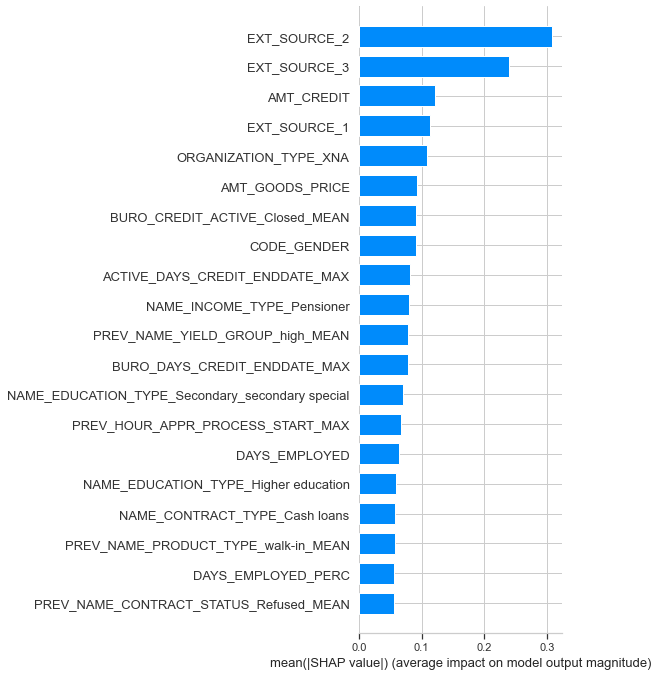

In [53]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

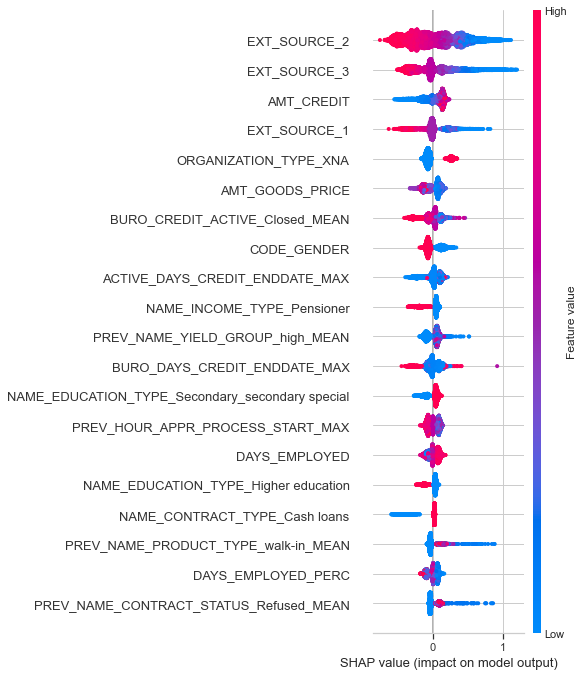

In [54]:
shap.summary_plot(shap_values, X_test)

**Table for a global analytic interpretation**

In [55]:
# compute mean of absolute values for shap values
vals = np.abs(shap_values1).mean(0)
# compute feature importance as a dataframe containing vals
feature_importance = pd.DataFrame(list(zip(X_columns, vals)),\
                                  columns=['col_name','feature_importance_vals'])
# display top 10 feature importance sorted
pd.set_option('display.max_rows', 150)
feature_importance.sort_values(by='feature_importance_vals', ascending=False)[0:10]

col_name  feature_importance_vals
14                    EXT_SOURCE_2                 0.308202
15                    EXT_SOURCE_3                 0.239848
1                       AMT_CREDIT                 0.122016
13                    EXT_SOURCE_1                 0.113745
38           ORGANIZATION_TYPE_XNA                 0.108224
2                  AMT_GOODS_PRICE                 0.093218
51  BURO_CREDIT_ACTIVE_Closed_MEAN                 0.091016
0                      CODE_GENDER                 0.090369
58  ACTIVE_DAYS_CREDIT_ENDDATE_MAX                 0.081256
32      NAME_INCOME_TYPE_Pensioner                 0.079320

In [56]:
pd.set_option('display.max_rows', 50)

### | Get customer number

On crée un DF data pour retrouver l'ID du dossier avec SHAP :

In [57]:
# correspondance with the array format (hence the reset index for data)
data = pd.DataFrame(y_test, index=y_test.index).reset_index()

In [58]:
data["PRED"] = y_pred

In [59]:
data.loc[data["TARGET"]==0,:]

SK_ID_CURR  TARGET  PRED
0         309296     0.0     0
1         316121     0.0     0
2         220130     0.0     0
3         254432     0.0     0
4         345565     0.0     1
...          ...     ...   ...
9995      341501     0.0     0
9996      141399     0.0     0
9997      264474     0.0     0
9998      129213     0.0     0
9999      155576     0.0     0

[9223 rows x 3 columns]

In [60]:
data.SK_ID_CURR.values

array([309296, 316121, 220130, ..., 264474, 129213, 155576], dtype=int64)

In [61]:
data.loc[data["TARGET"]==1,:]

SK_ID_CURR  TARGET  PRED
9         131463     1.0     0
21        416652     1.0     1
37        137415     1.0     0
57        363985     1.0     0
87        381375     1.0     1
...          ...     ...   ...
9949      330975     1.0     1
9963      272898     1.0     1
9966      126556     1.0     1
9977      328334     1.0     0
9985      147275     1.0     1

[777 rows x 3 columns]

In [62]:
# client number in the original X_test file
# ex granted : 316121
# ex not granted : 416652
idx = 416652
# client number in the corresponding array
data_idx = data.loc[data["SK_ID_CURR"]==idx].index[0]
print('original client number:', idx, '\ncorresponding array number :', data_idx)

original client number: 416652 
corresponding array number : 21


**vérification de l'index avec le dataframe y_test:**

In [63]:
data.iloc[data_idx]

SK_ID_CURR    416652.0
TARGET             1.0
PRED               1.0
Name: 21, dtype: float64

In [64]:
data.iloc[data_idx]["SK_ID_CURR"] == idx

True

En utilisant l'index **data_idx** fourni on retombe bien sur l'**idx choisi à l'origine**.<br>
La **correspondance** est donc **exacte**.

### | Use customer number to get corresponding SHAP values

In [65]:
# on utilise data_idx comme index et on récupère les données de X_test
# correspondantes à cet index dans la variable ID_to_predict
ID_to_predict = pd.DataFrame(X_test.iloc[data_idx,:]).T

In [66]:
ID_to_predict

CODE_GENDER  AMT_CREDIT  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  ELEVATORS_AVG  FLOORSMAX_AVG  LIVINGAREA_AVG  ELEVATORS_MODE  FLOORSMAX_MODE  LIVINGAREA_MODE  ELEVATORS_MEDI  FLOORSMAX_MEDI  LIVINGAREA_MEDI  TOTALAREA_MODE  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Higher education  NAME_EDUCATION_TYPE_Secondary_secondary special  OCCUPATION_TYPE_Drivers  OCCUPATION_TYPE_Laborers  ORGANIZATION_TYPE_XNA  HOUSETYPE_MODE_block of flats  WALLSMATERIAL_MODE_Panel  DAYS_EMPLOYED_PERC  BURO_DAYS_CREDIT_MIN  BURO_DAYS_CREDIT_MAX  BURO_DAYS_CREDIT_MEAN  BURO_DAYS_CREDIT_VAR  \
21          0.0   1314117.0        1147500.0                    0.007305    -19285.0        -7601.0            -1366.0          -2720.0             1.0                   3.0                          3.0                     0.0                      0.0      0.505998      0.159436      0.612704            0.0         0.1667          0.0745             0.0          0.1667           0.0731             0.0          0.1667           0.0749          0.0688                       0.0                       0.0                 -1456.0              0.0                            1.0                                 0.0                         0.0                       0.0                                   0.0                                              1.0                      1.0                       0.0                    0.0                            0.0                       0.0            0.394141               -1360.0                -129.0                -728.75         137829.357143   

    BURO_DAYS_CREDIT_ENDDATE_MIN  BURO_DAYS_CREDIT_ENDDATE_MAX  BURO_DAYS_CREDIT_ENDDATE_MEAN  BURO_DAYS_CREDIT_UPDATE_MEAN  BURO_CREDIT_ACTIVE_Active_MEAN  BURO_CREDIT_ACTIVE_Closed_MEAN  BURO_CREDIT_TYPE_Credit card_MEAN  BURO_CREDIT_TYPE_Microloan_MEAN  ACTIVE_DAYS_CREDIT_MIN  ACTIVE_DAYS_CREDIT_MAX  ACTIVE_DAYS_CREDIT_MEAN  ACTIVE_DAYS_CREDIT_VAR  ACTIVE_DAYS_CREDIT_ENDDATE_MAX  CLOSED_DAYS_CREDIT_MIN  CLOSED_DAYS_CREDIT_MEAN  CLOSED_DAYS_CREDIT_UPDATE_MEAN  PREV_AMT_ANNUITY_MIN  PREV_AMT_ANNUITY_MEAN  PREV_APP_CREDIT_PERC_MEAN  PREV_HOUR_APPR_PROCESS_START_MIN  PREV_HOUR_APPR_PROCESS_START_MAX  PREV_HOUR_APPR_PROCESS_START_MEAN  PREV_RATE_DOWN_PAYMENT_MAX  PREV_RATE_DOWN_PAYMENT_MEAN  PREV_DAYS_DECISION_MIN  PREV_DAYS_DECISION_MEAN  PREV_NAME_CONTRACT_TYPE_Consumer loans_MEAN  PREV_NAME_CONTRACT_TYPE_Revolving loans_MEAN  PREV_NAME_CONTRACT_STATUS_Approved_MEAN  PREV_NAME_CONTRACT_STATUS_Refused_MEAN  PREV_NAME_PAYMENT_TYPE_Cash through the bank_MEAN  \
21                        -781.0                        1453.0                          422.0                        -325.5                             0.5                             0.5                               0.25                              0.0                  -870.0                  -129.0                  -510.75               106088.25                          1453.0                 -1360.0                  -946.75                         -438.75               4540.05             29947.8225                   0.859907                               6.0                              16.0                           9.210526                    0.104292                     0.041764                 -2661.0             -1037.263158                                     0.263158                                      0.052632                                 0.421053                                0.210526                                           0.578947   

    PREV_NAME_PAYMENT_TYPE_XNA_MEAN  PREV_CODE_REJECT_REASON

In [67]:
data.iloc[data_idx]

SK_ID_CURR    416652.0
TARGET             1.0
PRED               1.0
Name: 21, dtype: float64

**vérification de la prédiction vs TARGET y_test:**

In [68]:
# on réalise la prédiction de ID_to_predict avec le modèle 
prediction = sum((model.predict_proba(ID_to_predict)[:, 1]>best_thresh)*1)
# (model.predict_proba(X_test)[:, 1]>best_thresh)*1
print('prediction:', prediction)
# on récupère la véritable classe y pour cet index
truth = y_test[idx]
print('truth:', truth)

prediction: 1
truth: 1.0


In [69]:
exp_val_log = explainer.expected_value

In [70]:
log_odds = round(explainer.model.predict(X_test.iloc[data_idx, :]),4)

In [71]:
exp_predict = round(np.exp(exp_val_log)/(1+np.exp(exp_val_log)),4)

In [72]:
prob_predict = round(np.exp(log_odds)/(1+np.exp(log_odds)),4)

In [73]:
prob_predict

0.1132

In [74]:
float(model.predict_proba(ID_to_predict)[:, 1])

0.1131997801504317

In [75]:
print('model reverts a log_odds of:', log_odds,'\nwhich corresponds to a probability of the 1 class of:', prob_predict)

model reverts a log_odds of: -2.0585 
which corresponds to a probability of the 1 class of: 0.1132


In [76]:
print('base values log_odds are:', exp_val_log,'\nwhich corresponds to a probability of the 1 class of:', exp_predict)

base values log_odds are: -2.7017622335991756 
which corresponds to a probability of the 1 class of: 0.0629


In [77]:
print('This probability of default is ',\
      (prob_predict > best_thresh)*'>',(prob_predict < best_thresh)*'<','class 1 threshold in the model.')
print('Hence the prediction is:', prediction)

This probability of default is  >  class 1 threshold in the model.
Hence the prediction is: 1


In [78]:
shap.force_plot(shap_values.base_values[1], shap_values.values[data_idx],\
                feature_names=shap_values.feature_names)

### | Use customer number to get corresponding customer main details

In [79]:
ID_to_predict

CODE_GENDER  AMT_CREDIT  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  ELEVATORS_AVG  FLOORSMAX_AVG  LIVINGAREA_AVG  ELEVATORS_MODE  FLOORSMAX_MODE  LIVINGAREA_MODE  ELEVATORS_MEDI  FLOORSMAX_MEDI  LIVINGAREA_MEDI  TOTALAREA_MODE  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Higher education  NAME_EDUCATION_TYPE_Secondary_secondary special  OCCUPATION_TYPE_Drivers  OCCUPATION_TYPE_Laborers  ORGANIZATION_TYPE_XNA  HOUSETYPE_MODE_block of flats  WALLSMATERIAL_MODE_Panel  DAYS_EMPLOYED_PERC  BURO_DAYS_CREDIT_MIN  BURO_DAYS_CREDIT_MAX  BURO_DAYS_CREDIT_MEAN  BURO_DAYS_CREDIT_VAR  \
21          0.0   1314117.0        1147500.0                    0.007305    -19285.0        -7601.0            -1366.0          -2720.0             1.0                   3.0                          3.0                     0.0                      0.0      0.505998      0.159436      0.612704            0.0         0.1667          0.0745             0.0          0.1667           0.0731             0.0          0.1667           0.0749          0.0688                       0.0                       0.0                 -1456.0              0.0                            1.0                                 0.0                         0.0                       0.0                                   0.0                                              1.0                      1.0                       0.0                    0.0                            0.0                       0.0            0.394141               -1360.0                -129.0                -728.75         137829.357143   

    BURO_DAYS_CREDIT_ENDDATE_MIN  BURO_DAYS_CREDIT_ENDDATE_MAX  BURO_DAYS_CREDIT_ENDDATE_MEAN  BURO_DAYS_CREDIT_UPDATE_MEAN  BURO_CREDIT_ACTIVE_Active_MEAN  BURO_CREDIT_ACTIVE_Closed_MEAN  BURO_CREDIT_TYPE_Credit card_MEAN  BURO_CREDIT_TYPE_Microloan_MEAN  ACTIVE_DAYS_CREDIT_MIN  ACTIVE_DAYS_CREDIT_MAX  ACTIVE_DAYS_CREDIT_MEAN  ACTIVE_DAYS_CREDIT_VAR  ACTIVE_DAYS_CREDIT_ENDDATE_MAX  CLOSED_DAYS_CREDIT_MIN  CLOSED_DAYS_CREDIT_MEAN  CLOSED_DAYS_CREDIT_UPDATE_MEAN  PREV_AMT_ANNUITY_MIN  PREV_AMT_ANNUITY_MEAN  PREV_APP_CREDIT_PERC_MEAN  PREV_HOUR_APPR_PROCESS_START_MIN  PREV_HOUR_APPR_PROCESS_START_MAX  PREV_HOUR_APPR_PROCESS_START_MEAN  PREV_RATE_DOWN_PAYMENT_MAX  PREV_RATE_DOWN_PAYMENT_MEAN  PREV_DAYS_DECISION_MIN  PREV_DAYS_DECISION_MEAN  PREV_NAME_CONTRACT_TYPE_Consumer loans_MEAN  PREV_NAME_CONTRACT_TYPE_Revolving loans_MEAN  PREV_NAME_CONTRACT_STATUS_Approved_MEAN  PREV_NAME_CONTRACT_STATUS_Refused_MEAN  PREV_NAME_PAYMENT_TYPE_Cash through the bank_MEAN  \
21                        -781.0                        1453.0                          422.0                        -325.5                             0.5                             0.5                               0.25                              0.0                  -870.0                  -129.0                  -510.75               106088.25                          1453.0                 -1360.0                  -946.75                         -438.75               4540.05             29947.8225                   0.859907                               6.0                              16.0                           9.210526                    0.104292                     0.041764                 -2661.0             -1037.263158                                     0.263158                                      0.052632                                 0.421053                                0.210526                                           0.578947   

    PREV_NAME_PAYMENT_TYPE_XNA_MEAN  PREV_CODE_REJECT_REASON

In [80]:
top_10 = feature_importance.sort_values(by='feature_importance_vals', ascending=False)[0:10].col_name.tolist()

In [81]:
top_10

['EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'AMT_CREDIT',
 'EXT_SOURCE_1',
 'ORGANIZATION_TYPE_XNA',
 'AMT_GOODS_PRICE',
 'BURO_CREDIT_ACTIVE_Closed_MEAN',
 'CODE_GENDER',
 'ACTIVE_DAYS_CREDIT_ENDDATE_MAX',
 'NAME_INCOME_TYPE_Pensioner']

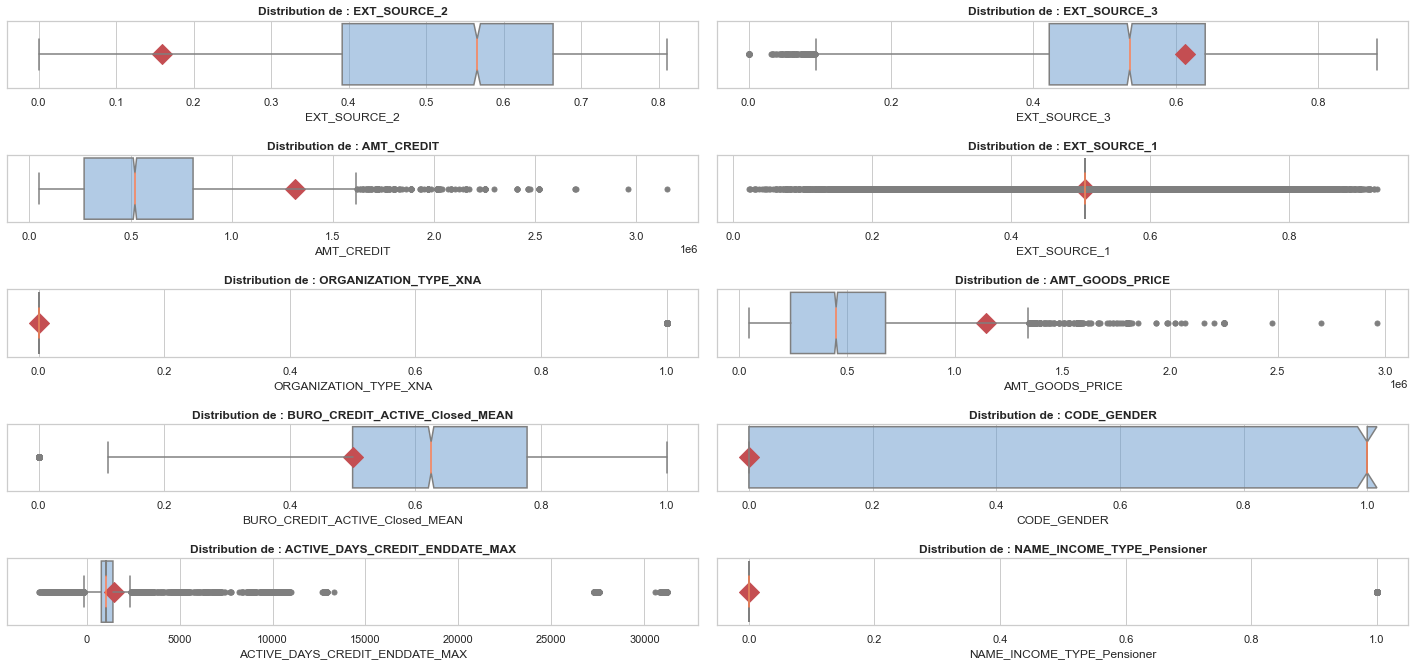

In [82]:
sel = top_10

width = 20
height = ((len(sel)+1)/2)*2

fig = plt.figure(figsize=(width, height))

for i, c in enumerate(sel,1):
    chaine = 'Distribution de : ' + c
    ax = fig.add_subplot((len(sel)+2)//2, 2, i)
    plt.title(chaine)
    sns.boxplot(x=X_test[c],
                orient='h',
                color='lightgrey',
                notch=True,
                flierprops={"marker": "o"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
                ax=ax)

# show customer ID values for each feature
    plt.scatter(ID_to_predict[c], c, marker = 'D', c='r', s=200)

sns.set_context("talk")
plt.tight_layout()

In [83]:
# alternative
# utiliser graph objects avec une boucle sur top_10
# pour montrer uniquement des données chiffrées

sel = top_10

fig = go.Figure()

for i, c in enumerate(sel,1):
    chaine = "Val / Var Mean :<br>" + c

    if ((i == 1) | (i == 2)):
        row = 0
        column = 1 - i%2
    
    elif i % 2 != 0:
        row = int(i/2)
        column = 0
    else:
        row = int((i-1)/2)
        column = 1
    
    fig.add_trace(go.Indicator(
        mode = "number+delta",
        value = ID_to_predict[c].iloc[0],
        delta = {'reference': np.mean(X_test[c]),
                 'valueformat': '.0f',
                 'increasing': {'color': 'green'},
                 'decreasing': {'color': 'red'}},
        title = chaine,
        domain = {'row': row, 'column': column}))

fig.update_layout(
    grid = {'rows': 5, 'columns': 2, 'pattern': "independent", 'xgap' : 0.5, 'ygap' : 0.6})

fig.update_layout(
    autosize=False,
    width=900,
    height=700,)

plt.tight_layout()

fig.show()

<Figure size 432x288 with 0 Axes>

CODE_GENDER : '0' is MALE / '1' is FEMALE

### | Jauge vizualisation

In [84]:
if prob_predict < best_thresh:
    title_auto = {'text':"<b>No probability of default detected</b><br>\
<span style='color: forestgreen; font-size:0.9em'>Credit<br><b>Granted</b></span>", \
                  'font': {'color': 'forestgreen', 'size': 15}}
else:
    title_auto = {'text':"<b>Probability of default detected</b><br>\
<span style='color: crimson; font-size:0.9em'>Credit<br><b>Not granted</b></span>", \
                  'font': {'color': 'crimson', 'size': 15}}


fig = go.Figure(go.Indicator(
    domain = {'x': [0, 1], 'y': [0, 1]},
    value = prob_predict,
    mode = "gauge+number+delta",
    title = title_auto,
    delta = {'reference': best_thresh},
    gauge = {'axis': {'range': [None, 1]},
             'bgcolor': "crimson",
             'borderwidth': 2,
             'bordercolor': "gray",
             'steps' : [
                 {'range': [0, best_thresh], 'color': "forestgreen"},
                 {'range': [best_thresh, 0.5], 'color': "crimson"}],
             'threshold' : {'line': {'color': "crimson", 'width': 2}, 'thickness': 1, 'value': best_thresh},
             'bar': {'color': "palegoldenrod"}}))

if prob_predict < best_thresh:
    fig.update_layout(paper_bgcolor = "honeydew", font = {'color': "darkgreen", 'family': "Arial"})
else:
    fig.update_layout(paper_bgcolor = "lavenderblush", font = {'color': "crimson", 'family': "Arial"})

fig.show()

### | Observation vs Group

In [85]:
top_20 = feature_importance.sort_values(by='feature_importance_vals', ascending=False)[0:20].col_name.tolist()

In [86]:
feat_tot = feature_importance.feature_importance_vals.sum()

In [87]:
feat_top = feature_importance.loc[feature_importance['col_name'].isin(top_20)].feature_importance_vals.sum()

In [88]:
print('les 20 premières features représentent', round((feat_top/feat_tot)*100, 2),'% de l\'importance de toutes les features.')

les 20 premières features représentent 57.57 % de l'importance de toutes les features.


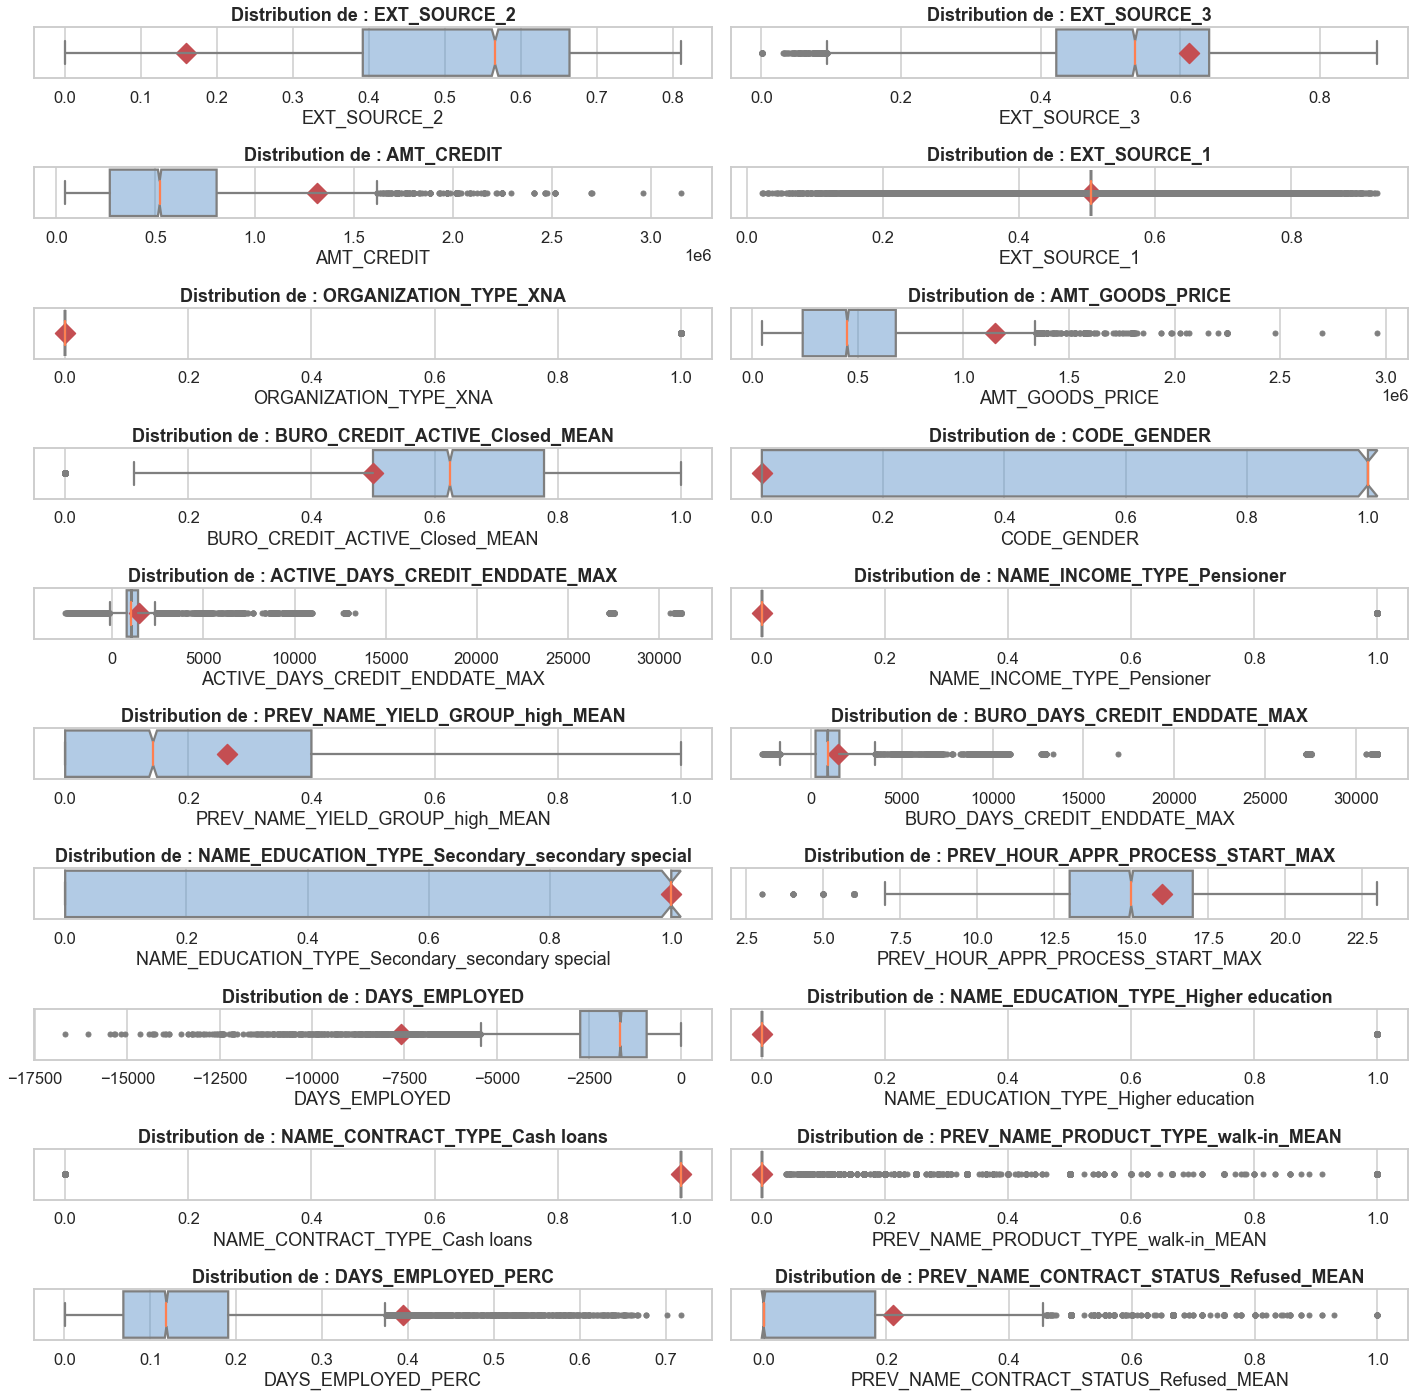

In [89]:
# Show boxplot for each feature with original units
# selection of 20 most explicative features
sel = top_20

width = 20
height = ((len(sel)+1)/2)*2

fig = plt.figure(figsize=(width, height))

for i, c in enumerate(sel,1):
    chaine = 'Distribution de : ' + c
    ax = fig.add_subplot((len(sel)+2)//2, 2, i)
    plt.title(chaine)
    sns.boxplot(x=X_test[c],
                orient='h',
                color='lightgrey',
                notch=True,
                flierprops={"marker": "o"},
                boxprops={"facecolor": (.4, .6, .8, .5)},
                medianprops={"color": "coral"},
                ax=ax)

# show customer ID values for each feature
    plt.scatter(ID_to_predict[c], c, marker = 'D', c='r', s=200)

# scaling automatique ('notebook', 'paper', 'talk', 'poster')
sns.set_context("talk")
fig.tight_layout()

Vérification des valeurs retournées dans les boxplot pour ID_to_predict :

In [90]:
ID_to_predict[["EXT_SOURCE_2", "EXT_SOURCE_3", "EXT_SOURCE_1", "ORGANIZATION_TYPE_XNA", "NAME_INCOME_TYPE_Pensioner",
              "AMT_GOODS_PRICE", "PREV_HOUR_APPR_PROCESS_START_MAX", "CODE_GENDER", "PREV_NAME_YIELD_GROUP_high_MEAN"]]

EXT_SOURCE_2  EXT_SOURCE_3  EXT_SOURCE_1  ORGANIZATION_TYPE_XNA  NAME_INCOME_TYPE_Pensioner  AMT_GOODS_PRICE  PREV_HOUR_APPR_PROCESS_START_MAX  CODE_GENDER  PREV_NAME_YIELD_GROUP_high_MEAN
21      0.159436      0.612704      0.505998                    0.0                         0.0        1147500.0                              16.0          0.0                         0.263158

### | Force plot visualization & explanation

In [91]:
# link = 'logit' to get the output in the same unit than the model target
# here we can see the probability of class 1
shap.force_plot(
    explainer.expected_value,
    shap_values1[data_idx, :],
    X_test.iloc[data_idx, :],
    link='logit' # choose between 'logit' or 'identity'
)

In [92]:
print(f'the model predicted :',round(float(model['classifier'].predict_proba(ID_to_predict)[:,1]),4))

the model predicted : 0.1132


**How do we interpret this result?**

The model predicted a probability for class 1 of 0.0657, whereas the base_value is 0.0677. Feature values causing increased predictions are in pink, and their visual size shows the magnitude of the feature's effect. Feature values decreasing the prediction are in blue.

The biggest impact comes from EXT_SOURCE_2 being 0.6674, followed by APPROVED_APP_CREDIT_PERC_MAX being 1.111. Though the EXT_SOURCE_3 value has also a meaningful effect increasing the prediction.

If you subtract the length of the blue bars from the length of the pink bars, it equals the distance from the base value to the output.

### | Waterfall visualization & explanation

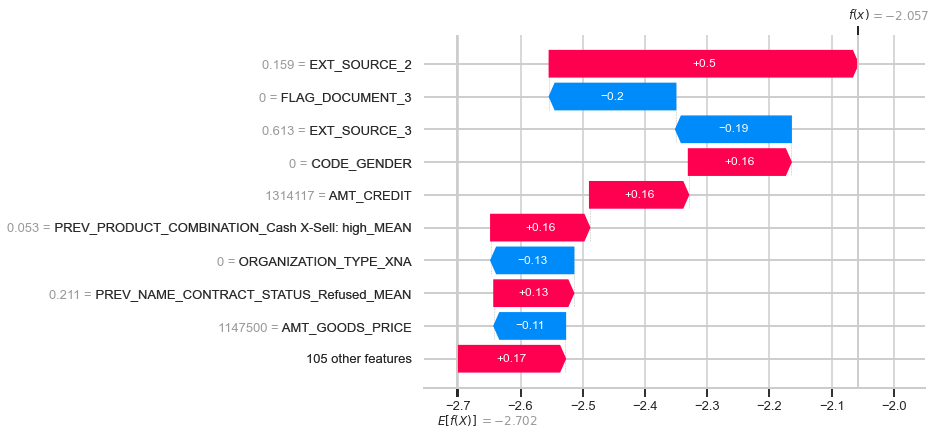

In [93]:
shap.waterfall_plot(shap_values[data_idx], max_display=10, show=True)

### | Proposed visualizations

In [94]:
explainer.expected_value

-2.7017622335991756

In [95]:
shap_values.base_values[data_idx]

-2.7017622335991756

In [96]:
def sample_feature_importance(idx, type='feat_import'):
    if type=='odds_default':
        return shap.force_plot(shap_values.base_values[idx], shap_values1[idx, :],\
                               X_test.iloc[idx, :])
    
    elif type=='base_val_to_odds':
        return shap.waterfall_plot(shap_values[idx],
                                   max_display=10)
    
    elif type=='summary_global':
        return shap.summary_plot(shap_values, X_test,
                                 max_display=10, # nb of displayed features
                                )
    
    elif type=='feat_import':
        return shap.summary_plot(shap_values, X_test,
                                 plot_type="bar", feature_names=X_columns)

    elif type=='prob_default':
        return shap.force_plot(shap_values.base_values[idx],
                               shap_values1[idx, :],
                               X_test.iloc[idx, :],
                               link='logit') # choose between 'logit' or 'identity'

    else:
        return "Return valid visual ('feat_import', 'base_val_to_odds', 'summary_global',\
        'odds_default', 'prob_default')"

plt.show()

In [97]:
sample_feature_importance(data_idx, type='odds_default')

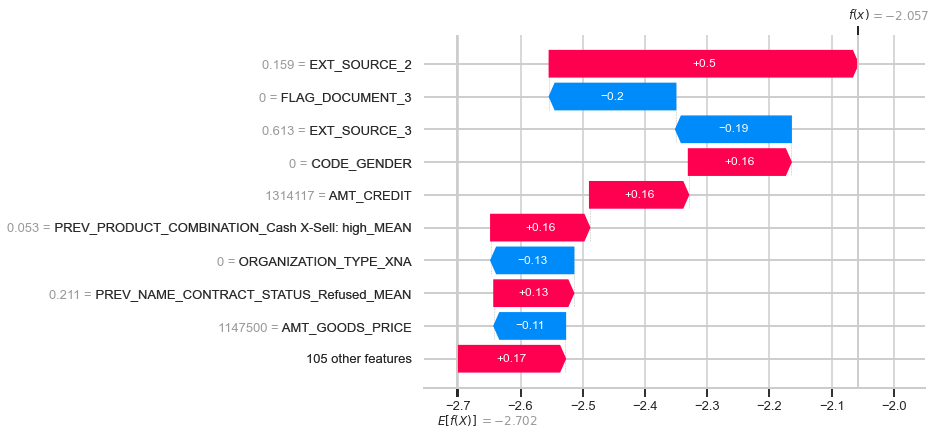

In [98]:
sample_feature_importance(data_idx, type='base_val_to_odds')

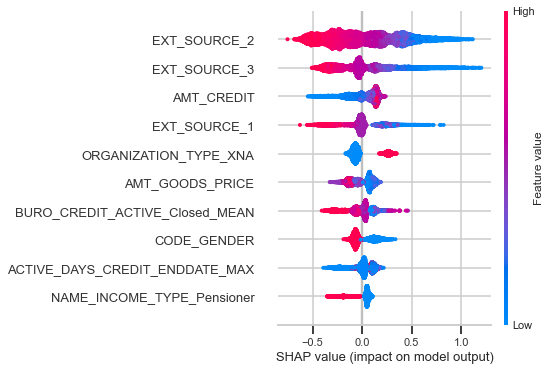

In [99]:
sample_feature_importance(data_idx, type='summary_global')

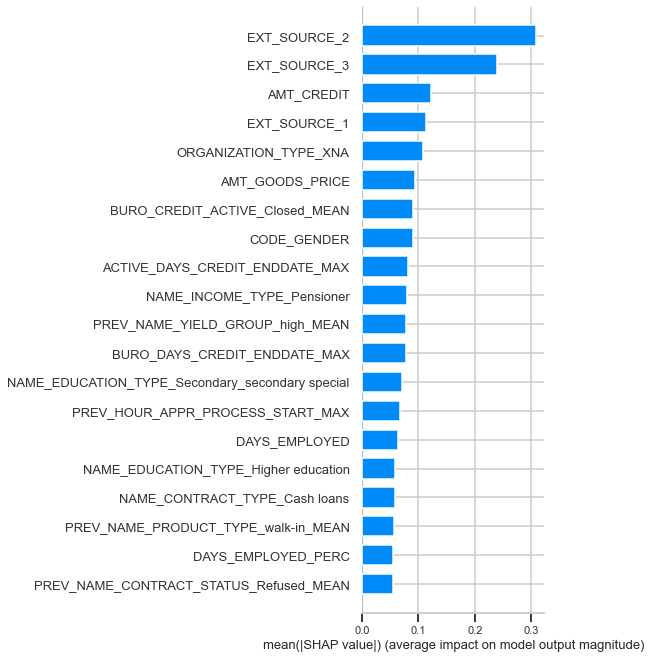

In [100]:
sample_feature_importance(data_idx, type='feat_import')

In [101]:
sample_feature_importance(data_idx, type='prob_default')

### | Other visualizations

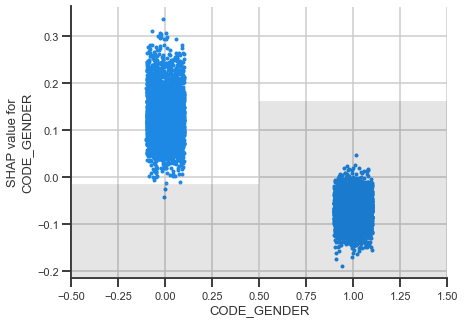

In [102]:
# visualize the model's dependence on the first feature
shap.plots.scatter(shap_values[:, 0])

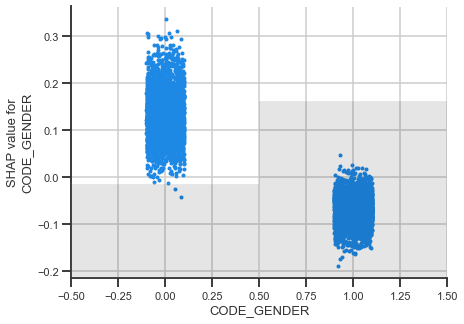

In [103]:
# visualize the model's dependence on the first feature again, now in the new original feature space
shap.plots.scatter(shap_values[:, 0])

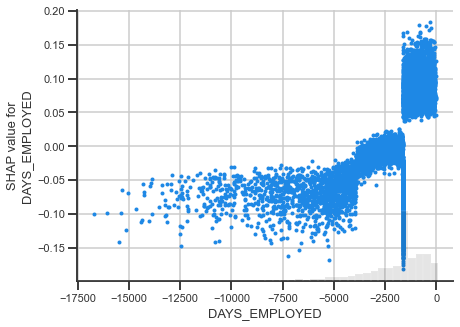

In [104]:
shap.plots.scatter(shap_values[:, "DAYS_EMPLOYED"])

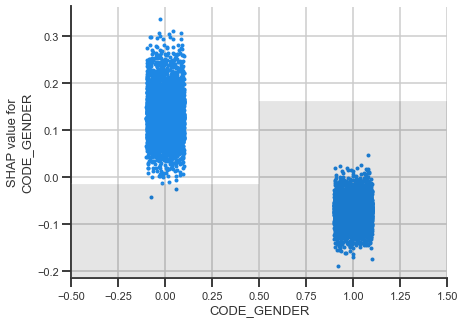

In [105]:
# visualize the model's dependence on a particular feature [col number]
# in the original feature space
shap.plots.scatter(shap_values[:, 0])

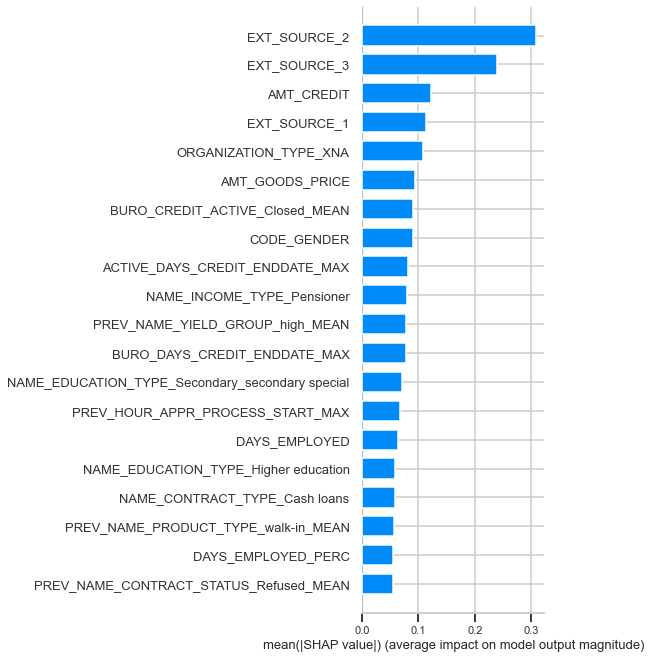

In [106]:
#plot the feature importance
# ajouter valeur en dur dessus 
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_columns)

In [107]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values1[0:30,:], X_test.iloc[0:30,:])

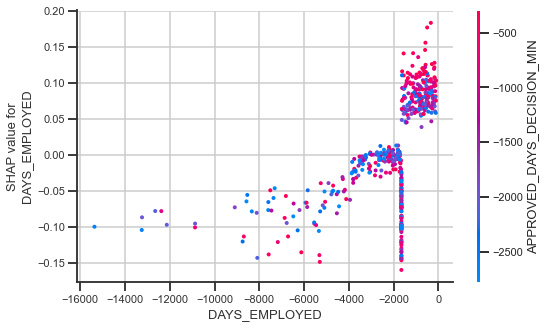

In [108]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("DAYS_EMPLOYED",
                     shap_values1[0:500,:],
                     X_test.iloc[0:500,:])

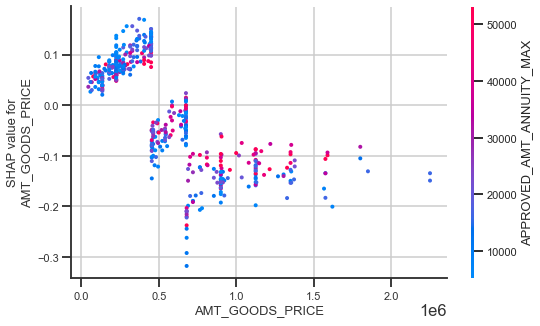

In [109]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("AMT_GOODS_PRICE",
                     shap_values1[0:500,:],
                     X_test.iloc[0:500,:])

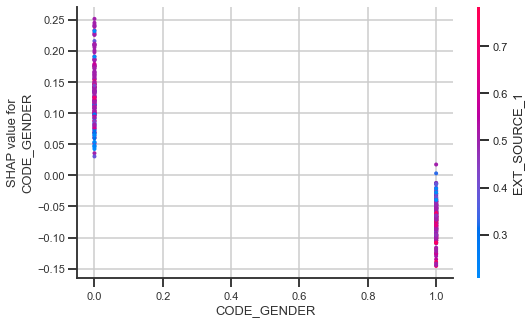

In [110]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("CODE_GENDER",
                     shap_values1[0:500,:],
                     X_test.iloc[0:500,:])

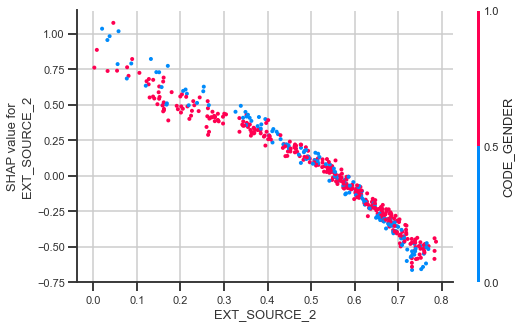

In [111]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("EXT_SOURCE_2",
                     shap_values1[0:500,:],
                     X_test.iloc[0:500,:])

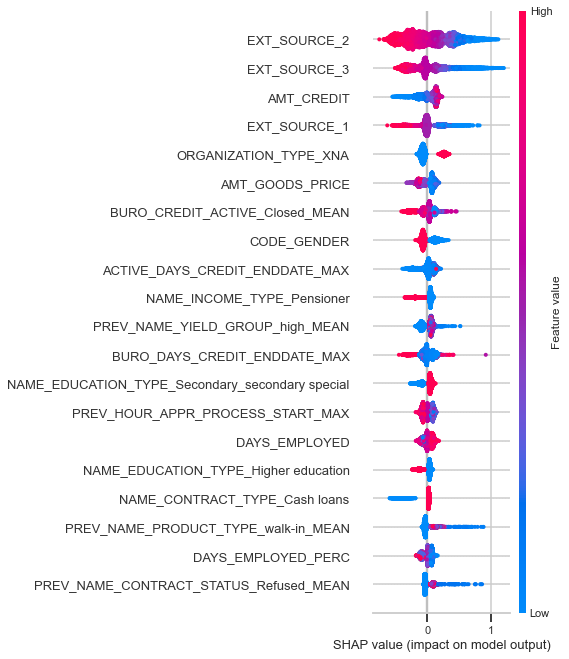

In [112]:
# summarize the effects of all the features
shap.summary_plot(shap_values1[0:10000,:], X_test.iloc[0:10000,:])

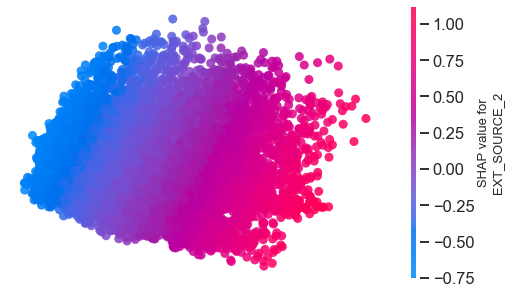

In [113]:
shap.embedding_plot("EXT_SOURCE_2", shap_values1, feature_names=X_columns,\
                    method='pca', alpha=0.85, show=True)

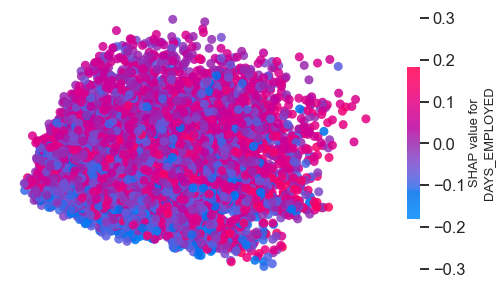

In [114]:
shap.embedding_plot("DAYS_EMPLOYED", shap_values1, feature_names=X_columns,\
                    method='pca', alpha=0.85, show=True)

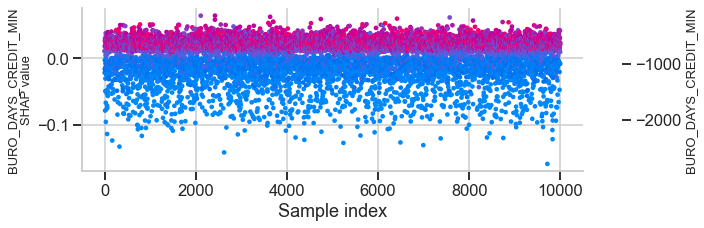

In [115]:
shap.monitoring_plot(42, shap_values1, X_test, feature_names=X_columns, show=True)

### | Dependencies

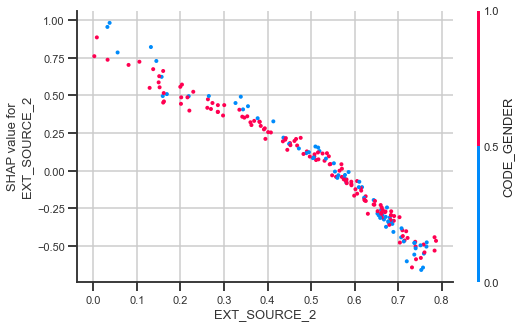

In [116]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("EXT_SOURCE_2",
                     shap_values1[0:200,:],
                     X_test.iloc[0:200,:])

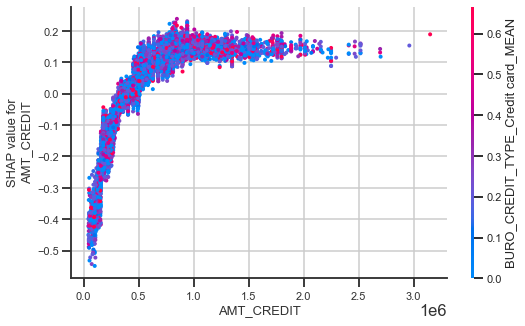

In [117]:
shap.dependence_plot('AMT_CREDIT',
                     shap_values1,
                     features = X_test,
                     feature_names=X_columns,
                     display_features = X_test,
                     interaction_index="BURO_CREDIT_TYPE_Credit card_MEAN")

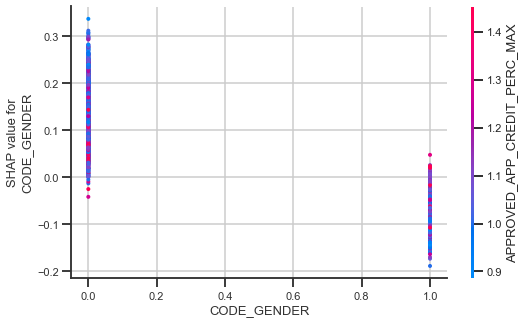

In [118]:
shap.dependence_plot('CODE_GENDER',
                     shap_values1,
                     features = X_test,
                     feature_names=X_columns,
                     display_features = X_test,
                     interaction_index="APPROVED_APP_CREDIT_PERC_MAX")

Dependencies with the top 3 features in the dataset :

In [119]:
# Sort the features indexes by their importance in the model
# (sum of SHAP value magnitudes over the validation dataset)
top_inds = np.argsort(-np.sum(np.abs(shap_values1), 0))

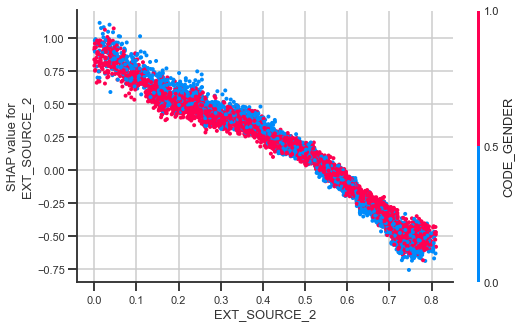

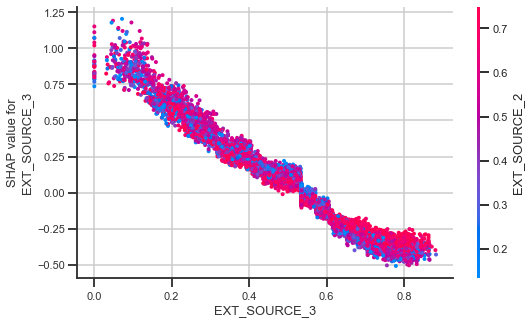

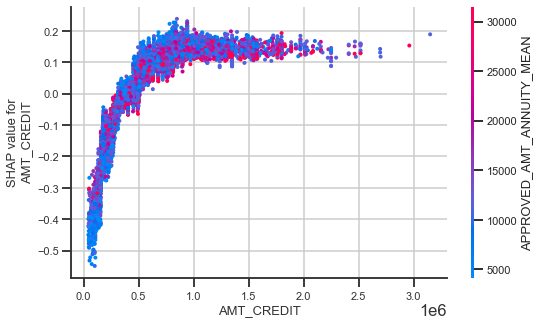

In [120]:
# make SHAP plots of the three most important features
for i in range(3):
    shap.dependence_plot(top_inds[i],
                         shap_values1,
                         features = X_test,
                         feature_names=X_columns,
                         display_features = X_test,)

# | Pickle backup | Feature explainer, SHAPE values, expected value

In order to get similar graphics and data availibility with Streamlite, I export the final versions of data, explainer and shape values.

In [121]:
# Backup Model final
joblib.dump(model, 'Models/model.joblib')

# Backup X_test
joblib.dump(X_test, 'Models/X_test.pkl')

# Backup y_test
joblib.dump(y_test, 'Models/y_test.pkl')

# Backup y_pred
joblib.dump(y_pred, 'Models/y_pred.pkl')

# backup SHAP explainer
explainer.save(open('Models/explainer', 'wb') , model_saver="auto", masker_saver="auto")

# Backup SHAP values
joblib.dump(shap_values, 'Models/shap_values.pkl')

# Backup SHAP values1
joblib.dump(shap_values1, 'Models/shap_values1.pkl')

# Backup Expected values
joblib.dump(explainer.expected_value, 'Models/expected_values.pkl')

['Models/expected_values.pkl']

# | Identification Shap_Values.data for GENDER_CODE

In [12]:
# on recharge les données de test
X_test = joblib.load('Models/X_test.pkl')

In [18]:
X_test

CODE_GENDER  AMT_CREDIT  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_EMP_PHONE  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  REG_CITY_NOT_LIVE_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  ELEVATORS_AVG  FLOORSMAX_AVG  LIVINGAREA_AVG  ELEVATORS_MODE  FLOORSMAX_MODE  LIVINGAREA_MODE  ELEVATORS_MEDI  FLOORSMAX_MEDI  LIVINGAREA_MEDI  TOTALAREA_MODE  DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  NAME_CONTRACT_TYPE_Cash loans  NAME_CONTRACT_TYPE_Revolving loans  NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_Working  NAME_EDUCATION_TYPE_Higher education  NAME_EDUCATION_TYPE_Secondary_secondary special  OCCUPATION_TYPE_Drivers  OCCUPATION_TYPE_Laborers  ORGANIZATION_TYPE_XNA  HOUSETYPE_MODE_block of flats  WALLSMATERIAL_MODE_Panel  DAYS_EMPLOYED_PERC  BURO_DAYS_CREDIT_MIN  BURO_DAYS_CREDIT_MAX  BURO_DAYS_CREDIT_MEAN  BURO_DAYS_CREDIT_VAR  \
0             0.0    497520.0         450000.0                    0.014464    -19654.0         -235.0           -13084.0          -3201.0             1.0                   2.0                          2.0                     0.0                      0.0      0.273594      0.752981      0.535276           0.00         0.1250          0.0396          0.0000          0.1250           0.0413            0.00          0.1250           0.0404          0.0323                       0.0                       0.0                 -1550.0              1.0                            1.0                                 0.0                         0.0                       1.0                                   0.0                                              1.0                      0.0                       0.0                    0.0                            1.0                       0.0            0.011957               -1827.0                -300.0           -1050.571429          3.851066e+05   
1             0.0    719946.0         643500.0                    0.019101    -10698.0        -2582.0             -465.0          -3323.0             1.0                   2.0                          2.0                     0.0                      0.0      0.514014      0.667375      0.385915           0.35         0.4583          0.2140          0.4028          0.4583           0.1807            0.40          0.4583           0.2203          0.1964                       0.0                       0.0                 -2526.0              1.0                            1.0                                 0.0                         0.0                       1.0                                   0.0                                              1.0                      0.0                       0.0                    0.0                            1.0                       0.0            0.241354               -2171.0                -267.0            -887.000000          7.657707e+05   
2             1.0    544491.0         454500.0                    0.020246    -12552.0        -1020.0            -2360.0          -2692.0             1.0                   3.0                          3.0                     0.0                      0.0      0.793300      0.445463      0.191822           0.14         0.3542          0.1294          0.1208          0.3333           0.1119            0.14          0.3542           0.1317          0.0851                       0.0                       0.0                 -1168.0              1.0                            1.0                                 0.0                         0.0                       1.0                                   1.0                                              0.0                      0.0                       0.0                    0.0                            1.0                       0.0            0.081262               -2769.0               -2369.0           -2569.000000          8.000000e+04   
3     

In [50]:
X_test.CODE_GENDER.value_counts()

1.0    6535
0.0    3465
Name: CODE_GENDER, dtype: int64

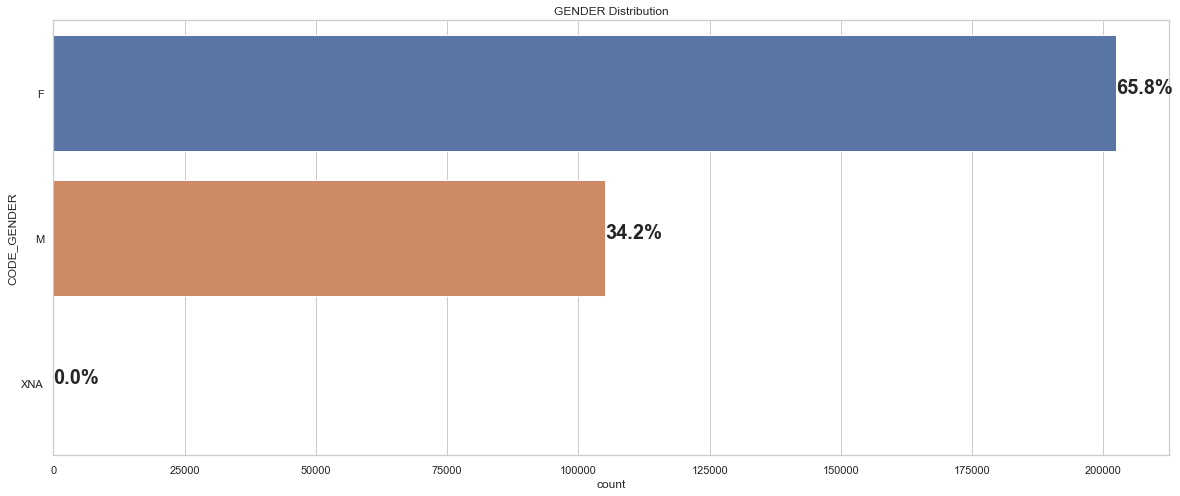

Same proportions than in EDA phase :
-  CODE_GENDER 1 = Female
-  CODE_GENDER 0 = Male

Need to add a comment in the Streamlit App to help understand this field.<br>
Next time a real One Hot Encoding in 2 columns would be best for better understanding.